In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
factorData = pd.read_csv("C:/Users/Armen/Documents/CSCI 4502/Project/retrosheet-events-plus-woba-2005_2015.csv") #All data
altitudeData = pd.read_excel("C:/Users/Armen/Documents/CSCI 4502/Project/Park_Factor/Project_Code/MLB_Stadium_Altitudes.xlsx") #Data of altitudes

In [3]:
HomeRunData = factorData.drop(factorData[factorData.event_cd!=23].index) #Data of only homeruns
HomeRun_AltitudeData = pd.merge(HomeRunData, altitudeData, on='home_team_id') #homerun data with altitudes
AllData_AltitudeData = pd.merge(factorData, altitudeData, on='home_team_id') #all data with altitudesPlayers_Stadiums = HomeRun_AltitudeData[['home_team_id','bat_id']];

In [4]:
Players_Stadiums = HomeRun_AltitudeData[['home_team_id','bat_id']];
Unique_Players = Players_Stadiums.drop_duplicates('bat_id');  # Show all unique players
Player_Homeruns = Players_Stadiums['bat_id'].value_counts(ascending=False).to_frame('homeruns'); #Count total homeruns of each player
Player_Homeruns.index.name = 'bat_id';  #Create bat_id column
Player_Homeruns.reset_index(inplace = True); #Create bat_id column

Player_Homeruns

,bat_id,homeruns
0,pujoa001,400
1,ortid001,373
2,cabrm001,362
3,howar001,355
4,dunna001,344
5,teixm001,330
6,fielp001,311
7,rodra001,306
8,gonza003,288
9,soria001,286


In [71]:
top5Players = Player_Homeruns.iloc[0:5,0].tolist();

Player_Data = HomeRun_AltitudeData[['bat_id','home_team_id','altitude']]; # Player Homerun data

Player1 = Player_Data.drop(Player_Data[Player_Data.bat_id!=top5Players[0]].index) # Top homerun scorer data only
Player2 = Player_Data.drop(Player_Data[Player_Data.bat_id!=top5Players[1]].index)
Player3 = Player_Data.drop(Player_Data[Player_Data.bat_id!=top5Players[2]].index)
Player4 = Player_Data.drop(Player_Data[Player_Data.bat_id!=top5Players[3]].index)
Player5 = Player_Data.drop(Player_Data[Player_Data.bat_id!=top5Players[4]].index)

Player1_homeruns = Player1['home_team_id'].value_counts().to_frame('Homeruns'); # Number of homeruns in each stadium for top homerun scorer only
Player2_homeruns = Player2['home_team_id'].value_counts().to_frame('Homeruns');
Player3_homeruns = Player3['home_team_id'].value_counts().to_frame('Homeruns');
Player4_homeruns = Player4['home_team_id'].value_counts().to_frame('Homeruns');
Player5_homeruns = Player5['home_team_id'].value_counts().to_frame('Homeruns');

Player1_homeruns.index.name = 'Stadium';  #Create Stadium column
Player1_homeruns.reset_index(inplace = True); #Create Stadium column
Player2_homeruns.index.name = 'Stadium';
Player2_homeruns.reset_index(inplace = True);
Player3_homeruns.index.name = 'Stadium';
Player3_homeruns.reset_index(inplace = True);
Player4_homeruns.index.name = 'Stadium';
Player4_homeruns.reset_index(inplace = True);
Player5_homeruns.index.name = 'Stadium';
Player5_homeruns.reset_index(inplace = True);

Player2_homeruns

['pujoa001', 'ortid001', 'cabrm001', 'howar001', 'dunna001']

In [50]:
Player_AllData = AllData_AltitudeData[['game_id','bat_id','home_team_id']]; # All data
                                      
Player1_AllData = Player_AllData.drop(Player_AllData[Player_AllData.bat_id!=top5Players[0]].index) #All data for only top home run scorer.
Player2_AllData = Player_AllData.drop(Player_AllData[Player_AllData.bat_id!=top5Players[1]].index)
Player3_AllData = Player_AllData.drop(Player_AllData[Player_AllData.bat_id!=top5Players[2]].index)
Player4_AllData = Player_AllData.drop(Player_AllData[Player_AllData.bat_id!=top5Players[3]].index)
Player5_AllData = Player_AllData.drop(Player_AllData[Player_AllData.bat_id!=top5Players[4]].index)

Player1_Games = Player1_AllData.drop_duplicates('game_id'); #Drop all entries that have the same game_id
Player2_Games = Player2_AllData.drop_duplicates('game_id');
Player3_Games = Player3_AllData.drop_duplicates('game_id');
Player4_Games = Player4_AllData.drop_duplicates('game_id');
Player5_Games = Player5_AllData.drop_duplicates('game_id');

Player1_GamesPlayed = Player1_Games['home_team_id'].value_counts().to_frame('Games Played'); # Count number of games player by top homerun scorer for each stadium
Player2_GamesPlayed = Player2_Games['home_team_id'].value_counts().to_frame('Games Played');
Player3_GamesPlayed = Player3_Games['home_team_id'].value_counts().to_frame('Games Played');
Player4_GamesPlayed = Player4_Games['home_team_id'].value_counts().to_frame('Games Played');
Player5_GamesPlayed = Player5_Games['home_team_id'].value_counts().to_frame('Games Played');

Player1_GamesPlayed.index.name = 'Stadium'; # Create Stadium column
Player1_GamesPlayed.reset_index(inplace = True); # Create Stadium column

Player2_GamesPlayed.index.name = 'Stadium'; 
Player2_GamesPlayed.reset_index(inplace = True);

Player3_GamesPlayed.index.name = 'Stadium'; 
Player3_GamesPlayed.reset_index(inplace = True);

Player4_GamesPlayed.index.name = 'Stadium'; 
Player4_GamesPlayed.reset_index(inplace = True);

Player5_GamesPlayed.index.name = 'Stadium'; 
Player5_GamesPlayed.reset_index(inplace = True);

Player2_GamesPlayed

,Stadium,Games Played
0,BOS,774
1,TOR,89
2,TBA,88
3,NYA,84
4,BAL,84
5,SEA,42
6,OAK,40
7,TEX,38
8,DET,38
9,CHA,35


In [51]:
Player1_HomeRunsandGames = pd.merge(Player1_homeruns,Player1_GamesPlayed, on='Stadium'); #Merge dataframe with player's homeruns and the number of games they've played
Player2_HomeRunsandGames = pd.merge(Player2_homeruns,Player2_GamesPlayed, on='Stadium');
Player3_HomeRunsandGames = pd.merge(Player3_homeruns,Player3_GamesPlayed, on='Stadium');
Player4_HomeRunsandGames = pd.merge(Player4_homeruns,Player4_GamesPlayed, on='Stadium');
Player5_HomeRunsandGames = pd.merge(Player5_homeruns,Player5_GamesPlayed, on='Stadium');

Player1_HomeRunsandGames['Home Runs per Game'] = Player1_HomeRunsandGames['Homeruns'] / Player1_HomeRunsandGames['Games Played']; #Create a homeruns per game category
Player2_HomeRunsandGames['Home Runs per Game'] = Player2_HomeRunsandGames['Homeruns'] / Player2_HomeRunsandGames['Games Played'];
Player3_HomeRunsandGames['Home Runs per Game'] = Player3_HomeRunsandGames['Homeruns'] / Player3_HomeRunsandGames['Games Played'];
Player4_HomeRunsandGames['Home Runs per Game'] = Player4_HomeRunsandGames['Homeruns'] / Player4_HomeRunsandGames['Games Played'];
Player5_HomeRunsandGames['Home Runs per Game'] = Player5_HomeRunsandGames['Homeruns'] / Player5_HomeRunsandGames['Games Played'];

Player2_HomeRunsandGames

,Stadium,Homeruns,Games Played,Home Runs per Game
0,BOS,167,774,0.215762
1,TOR,31,89,0.348315
2,TBA,27,88,0.306818
3,NYA,20,84,0.238095
4,BAL,18,84,0.214286
5,DET,15,38,0.394737
6,TEX,14,38,0.368421
7,SEA,12,42,0.285714
8,MIN,10,33,0.303030
9,CHA,8,35,0.228571


In [74]:
altitudeData.columns = ['Stadium', 'Altitude'];
Player1_FinalData = pd.merge(Player1_HomeRunsandGames,altitudeData, on='Stadium'); #Add the altitude column to dataframe
Player2_FinalData = pd.merge(Player2_HomeRunsandGames,altitudeData, on='Stadium');
Player3_FinalData = pd.merge(Player3_HomeRunsandGames,altitudeData, on='Stadium');
Player4_FinalData = pd.merge(Player4_HomeRunsandGames,altitudeData, on='Stadium');
Player5_FinalData = pd.merge(Player5_HomeRunsandGames,altitudeData, on='Stadium');

Player1_FinalData.sort_values("Altitude", ascending=False, inplace=True); # Sort Altitude column by descending order
Player2_FinalData.sort_values("Altitude", ascending=False, inplace=True);
Player3_FinalData.sort_values("Altitude", ascending=False, inplace=True);
Player4_FinalData.sort_values("Altitude", ascending=False, inplace=True);
Player5_FinalData.sort_values("Altitude", ascending=False, inplace=True);


Player1_FinalData['Home Runs per Game'].corr(Player1_FinalData['Altitude']) # Find correlation
Player2_FinalData['Home Runs per Game'].corr(Player1_FinalData['Altitude'])
Player3_FinalData['Home Runs per Game'].corr(Player1_FinalData['Altitude'])
Player4_FinalData['Home Runs per Game'].corr(Player1_FinalData['Altitude'])
Player5_FinalData['Home Runs per Game'].corr(Player1_FinalData['Altitude'])



Player1_FinalData




,Stadium,Homeruns,Games Played,Home Runs per Game,Altitude
22,COL,5,27,0.185185,5183
21,ARI,5,28,0.178571,1082
11,ATL,9,27,0.333333,1050
29,MIN,1,16,0.062500,812
8,KCA,11,35,0.314286,750
3,PIT,15,56,0.267857,743
6,CIN,12,54,0.222222,683
10,TEX,10,33,0.303030,616
2,CHN,17,55,0.309091,604
18,DET,7,20,0.350000,594


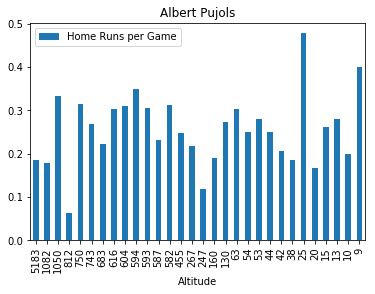

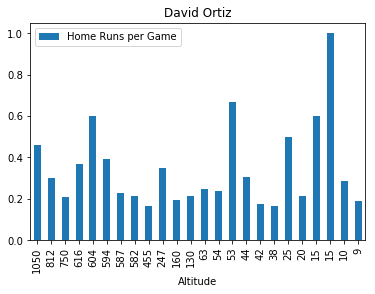

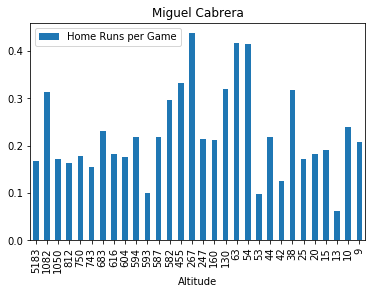

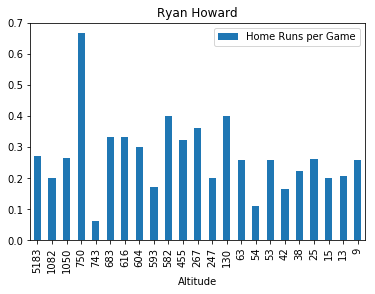

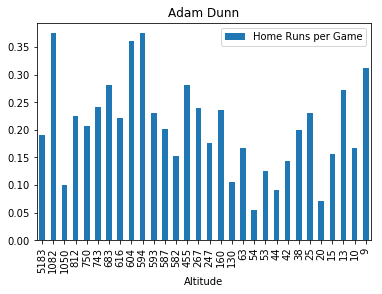

In [76]:
Player1_Graph = Player1_FinalData[['Altitude','Home Runs per Game']].plot(x='Altitude',y='Home Runs per Game',kind='bar', title='Albert Pujols')
Player2_Graph = Player2_FinalData[['Altitude','Home Runs per Game']].plot(x='Altitude',y='Home Runs per Game',kind='bar', title='David Ortiz')
Player3_Graph = Player3_FinalData[['Altitude','Home Runs per Game']].plot(x='Altitude',y='Home Runs per Game',kind='bar', title='Miguel Cabrera')
Player4_Graph = Player4_FinalData[['Altitude','Home Runs per Game']].plot(x='Altitude',y='Home Runs per Game',kind='bar', title='Ryan Howard')
Player5_Graph = Player5_FinalData[['Altitude','Home Runs per Game']].plot(x='Altitude',y='Home Runs per Game',kind='bar', title='Adam Dunn')
plt.show()